https://oj.rnd.huawei.com/problems/1189/details

题目描述
我们定义一种目录结构字符串(类似Windows的 tree /f 的输出内容)，用它来表达目录树的结构，如图所示：

- 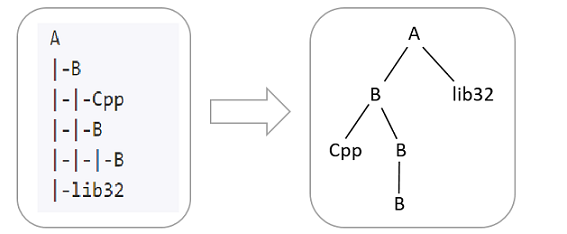

目录结构字符串的输入仅含数字、字母和|-，其中：|- 表示子目录的层次符号；字母或数字组成目录名（字母大小写敏感）。
某一子目录挂接在其前面、最近的上一层目录下。
给定一组目录结构字符串，及待删除的目录名（不含路径）的列表，请按如下要求删除所有符合条件的目录：

仅叶子目录，且在待删除的目录名列表中，才可以被删除。
注意：某目录的子目录被全部删除后，也视为叶子目录。

请输出最终被删除的不同路径目录的个数；如果没有被删除的目录，则输出 0。

上图中，如果待删除目录的目录名为B Cpp，则输出 4；如果待删除的目录名为A，则输出 0。

解答要求
时间限制：1000ms, 内存限制：256MB
输入
第1行一个字符串，表示待删除的目录名的列表，多个目录名通过单空格分隔，字符串长度范围 [1,100]；
第2行一个整数 num，表示给定目录结构字符串的行数，取值范围[1,50]；
接下来 num 行字符串，表示给定的目录结构字符串，每行长度范围[1,100]。

用例保证，输入的目录结构是合法的；有且仅有一个根目录；除根目录外，所有目录都有对应的父目录。

输出
一个整数，表示被删除的目录的个数。

样例
输入样例 1 复制

B Cpp
6
A
|-B
|-|-Cpp
|-|-B
|-|-|-B
|-lib32
输出样例 1

4
提示样例 1
A       // 根目录
|-B       // 第二层目录B，它前面最近的上一层目录为A，因此是A的子目录
|-|-Cpp     // 第三层目录Cpp，它前面最近的上一层目录为B，因此是第二层B的子目录
|-|-B       // 第三层目录B，它前面最近的上一层目录为B，因此是第二层B的子目录。
|-|-|-B     // 第四层目录B，是第三层B的子目录
|-lib32      // 第二层目录lib32，是A的子目录

删除目录名为 B 和 Cpp的目录：
目录 /A/B/Cpp 是叶子目录，需要被删除；
目录 /A/B/B/B 是叶子目录，需要被删除；然后/A/B/B 变成叶子目录，也需要被删除；
然后 /A/B也变成叶子目录，同样需要被删除。
共有 4 个目录被删除。



输入样例 2 复制

A Java
5
A
|-a
|-|-A
|-A
|-|-A
输出样例 2

3
提示样例 2
共有 3 个目录（/A/a/A、/A/A/A 和 /A/A ）被删除。 因大小写敏感，a 不是同名的，所以 /A/a 不会被删除；根目录 /A 不会被删除（非叶子目录）。




In [1]:
"""
Copyright (c) Huawei Technologies Co., Ltd. 2020-2020. All rights reserved.
Description: 上机编程认证
Note: 缺省代码仅供参考，可自行决定使用、修改或删除
"""
from typing import List

In [2]:
class Node:
    def __init__(self, val=None, child=None):
        self.val = val
        self.child = child if child else []
        self.count = None
        self.father = None


class Solution:
    def __init__(self):
        self.dir_tree_list = []
        self.dir_dict = {}
        self.count = 0
        self.is_in = False

    def build_tree(self, dir_tree_lines: List[str]):
        """
        第一步得构造出这颗树
        1、每个输入都带有| 符号，|的个数代表其所处的目录层级
        2、每个层级的层级数减一，最近的层级数就是其父亲目录
        """
        for dir_tree in dir_tree_lines:
            dir_tree = dir_tree.split('-')
            self.dir_tree_list.append([dir_tree[-1], len(dir_tree) - 1])

        # 先循环创建节点
        for num, node in enumerate(self.dir_tree_list):
            temp = Node(val=node[0])
            temp.count = node[1]
            self.dir_dict[num] = temp

        for i in range(1, len(self.dir_tree_list)):
            # 获取对应节点
            node = self.dir_dict[i]
            # 我们在固定范围内寻找
            for j in range(i - 1, -1, -1):
                item_node = self.dir_dict[j]
                if node.count == item_node.count + 1:
                    item_node.child.append(node)
                    node.father = item_node
                    break

    def is_full(self, node, dir_name_bunch: List[str]):
        if len(node.child) == 0 and node.val in dir_name_bunch:
            if node.father:
                child_list = node.father.child
                temp = []
                for i in range(len(child_list)):
                    if child_list[i] != node:
                        temp.append(child_list[i])
                node.father.child = temp
                self.is_in = True
            self.count += 1
            return True
        for child in node.child:
            self.is_full(child, dir_name_bunch)

    def del_directorys(self, dir_name_bunch: List[str], dir_tree_lines: List[str]) -> int:
        self.build_tree(dir_tree_lines)
        root = self.dir_dict[0]
        self.is_full(root, dir_name_bunch)
        while self.is_in:
            self.is_in = False
            self.is_full(root, dir_name_bunch)
        return self.count

In [3]:
dir_name_bunch = ['A']
dir_tree_lines = ['A','|-A','|-A']

In [4]:
sol = Solution()
sol.del_directorys(dir_name_bunch, dir_tree_lines)

3